#  AGRICULTURE ANALYSIS : EDA and DATA VISUALIZATION

#  Importing the dataset

In [1]:
pip install category_encoders 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df=pd.read_csv("agriculture.csv")

In [4]:
df.head()

,Unnamed: 0,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,0,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
1,1,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300,1000,0.303030
2,2,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,3,kharif,maize,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,4,kharif,moong,20,40,20,5.68,654.34,29.266667,1300,500,0.384615


In [5]:
df.tail()

,Unnamed: 0,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
9996,9996,summer,maize,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,9997,summer,moong,20,40,20,5.60,34.81,34.666667,488,211,0.432377
9998,9998,whole year,onion,120,60,65,5.94,689.88,29.037273,752,9080,12.074468
9999,9999,whole year,potato,180,60,90,5.02,689.88,29.037273,7595,167455,22.048058
10000,10000,kharif,maize,80,40,20,5.48,579.75,34.010000,11247,3385,0.300969


In [6]:
df.shape

(10001, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10001 non-null  int64  
 1   Crop_Type           10001 non-null  object 
 2   Crop                10001 non-null  object 
 3   N                   10001 non-null  int64  
 4   P                   10001 non-null  int64  
 5   K                   10001 non-null  int64  
 6   pH                  10001 non-null  float64
 7   rainfall            10001 non-null  float64
 8   temperature         10001 non-null  float64
 9   Area_in_hectares    10001 non-null  int64  
 10  Production_in_tons  10001 non-null  int64  
 11  target              10001 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 937.7+ KB


In [8]:
df.describe()

,Unnamed: 0,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,1.000100e+04,10001.000000
mean,5000.000000,69.146585,41.527847,39.709029,5.645313,670.237772,26.752053,18956.858714,3.886877e+04,4.128522
std,2887.184355,37.197031,13.998587,26.615039,0.487916,604.413140,5.078345,45938.016774,1.134659e+05,30.233001
min,0.000000,10.000000,10.000000,20.000000,4.820000,3.274569,1.180000,1.000000,1.000000e+00,0.000514
25%,2500.000000,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,193.000000,2.000000e+02,0.571429
50%,5000.000000,80.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1638.000000,2.000000e+03,1.180132
75%,7500.000000,80.000000,50.000000,40.000000,5.900000,1011.490000,29.566667,11435.000000,1.810000e+04,2.393728
max,10000.000000,180.000000,75.000000,150.000000,7.000000,3041.400000,35.346667,726300.000000,1.823000e+06,1494.000000


#  Data Collection and Preprocessing

In [9]:
df.isnull().sum()

Unnamed: 0            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
target                0
dtype: int64

In [10]:
df = df.drop(columns=['Unnamed: 0'],errors='ignore')

In [11]:
df.head()

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
1,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300,1000,0.303030
2,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,kharif,maize,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,kharif,moong,20,40,20,5.68,654.34,29.266667,1300,500,0.384615


In [12]:
df.tail()

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
9996,summer,maize,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,summer,moong,20,40,20,5.60,34.81,34.666667,488,211,0.432377
9998,whole year,onion,120,60,65,5.94,689.88,29.037273,752,9080,12.074468
9999,whole year,potato,180,60,90,5.02,689.88,29.037273,7595,167455,22.048058
10000,kharif,maize,80,40,20,5.48,579.75,34.010000,11247,3385,0.300969


In [13]:
df.shape

(10001, 11)

Dimensions of the dataset are 10001 rows and 11 columns.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop_Type           10001 non-null  object 
 1   Crop                10001 non-null  object 
 2   N                   10001 non-null  int64  
 3   P                   10001 non-null  int64  
 4   K                   10001 non-null  int64  
 5   pH                  10001 non-null  float64
 6   rainfall            10001 non-null  float64
 7   temperature         10001 non-null  float64
 8   Area_in_hectares    10001 non-null  int64  
 9   Production_in_tons  10001 non-null  int64  
 10  target              10001 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 859.6+ KB


Out of 11 variables , we have two categorical variables(Crop_Type,Crop) , 4 continuous variables in float(pH,rainfall,temperature,target) , and 5 integer variables(N,P,K,Area_in_hectares,Production_in_tons).

In [15]:
df.describe()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
count,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,10001.000000,1.000100e+04,10001.000000
mean,69.146585,41.527847,39.709029,5.645313,670.237772,26.752053,18956.858714,3.886877e+04,4.128522
std,37.197031,13.998587,26.615039,0.487916,604.413140,5.078345,45938.016774,1.134659e+05,30.233001
min,10.000000,10.000000,20.000000,4.820000,3.274569,1.180000,1.000000,1.000000e+00,0.000514
25%,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,193.000000,2.000000e+02,0.571429
50%,80.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1638.000000,2.000000e+03,1.180132
75%,80.000000,50.000000,40.000000,5.900000,1011.490000,29.566667,11435.000000,1.810000e+04,2.393728
max,180.000000,75.000000,150.000000,7.000000,3041.400000,35.346667,726300.000000,1.823000e+06,1494.000000


In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [17]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

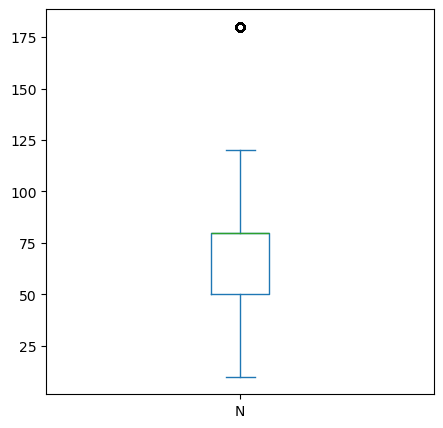

In [18]:
plt.figure(figsize=(5,5))
df['N'].plot(kind = 'box')
plt.show()

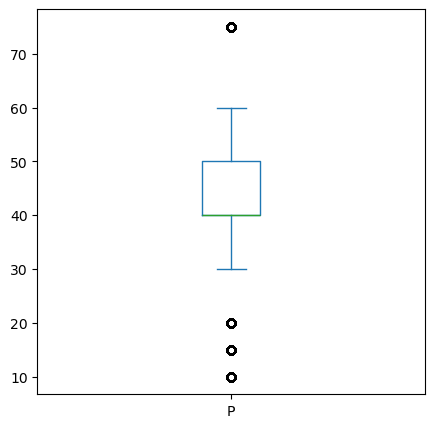

In [19]:
plt.figure(figsize=(5,5))
df['P'].plot(kind = 'box')
plt.show()

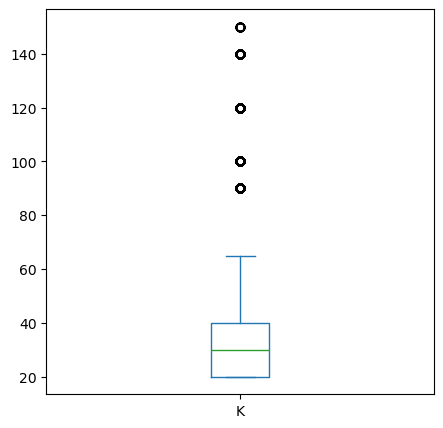

In [20]:
plt.figure(figsize=(5,5))
df['K'].plot(kind = 'box')
plt.show()

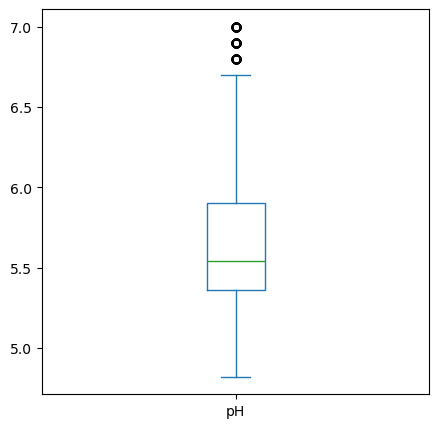

In [21]:
plt.figure(figsize=(5,5))
df['pH'].plot(kind = 'box')
plt.show()

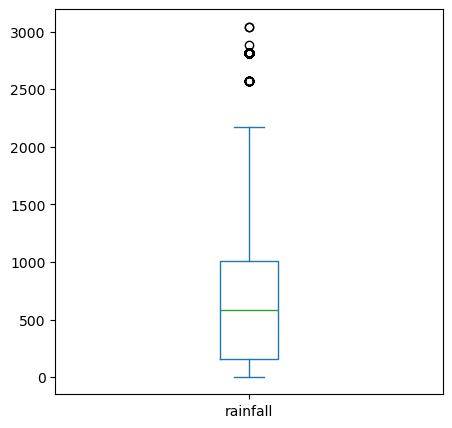

In [22]:
plt.figure(figsize=(5,5))
df['rainfall'].plot(kind = 'box')
plt.show()

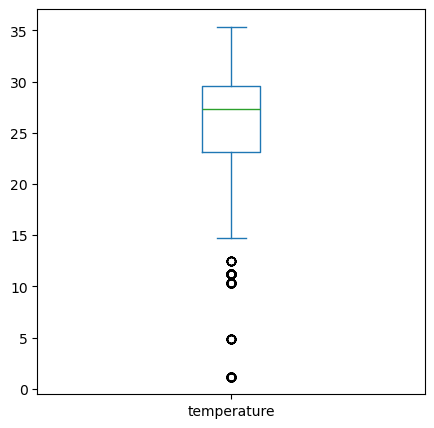

In [23]:
plt.figure(figsize=(5,5))
df['temperature'].plot(kind = 'box')
plt.show()

In [24]:
def remove_outliers_iqr(df, numerical_columns):
    cleaned_data = df.copy()
    for col in numerical_columns:
        Q1 = cleaned_data[col].quantile(0.25)
        Q3 = cleaned_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]
    return cleaned_data

In [25]:
df = remove_outliers_iqr(df, numerical_cols)

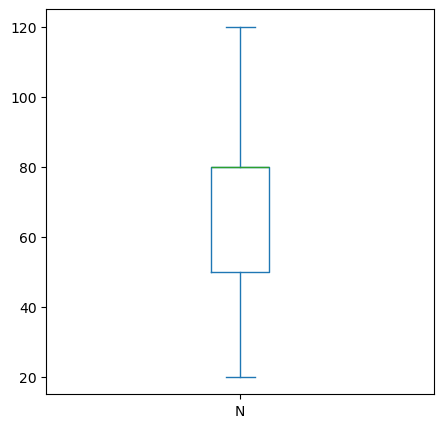

In [26]:
plt.figure(figsize=(5,5))
df['N'].plot(kind = 'box')
plt.show()

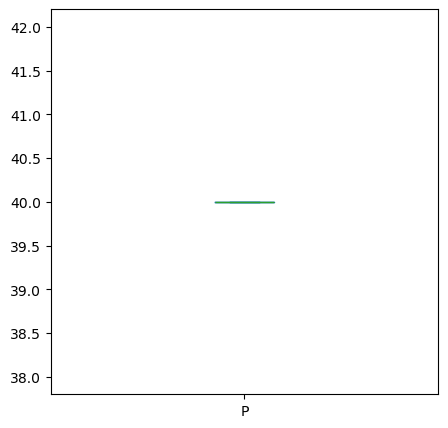

In [27]:
plt.figure(figsize=(5,5))
df['P'].plot(kind = 'box')
plt.show()

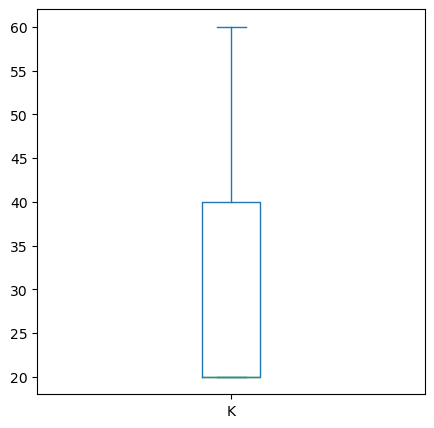

In [28]:
plt.figure(figsize=(5,5))
df['K'].plot(kind = 'box')
plt.show()

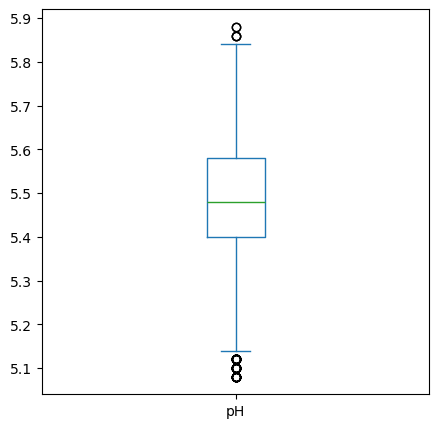

In [29]:
plt.figure(figsize=(5,5))
df['pH'].plot(kind = 'box')
plt.show()

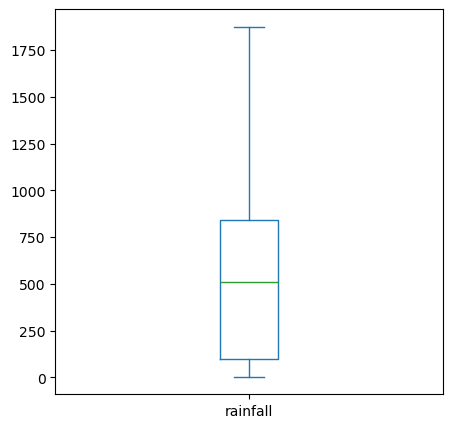

In [30]:
plt.figure(figsize=(5,5))
df['rainfall'].plot(kind = 'box')
plt.show()

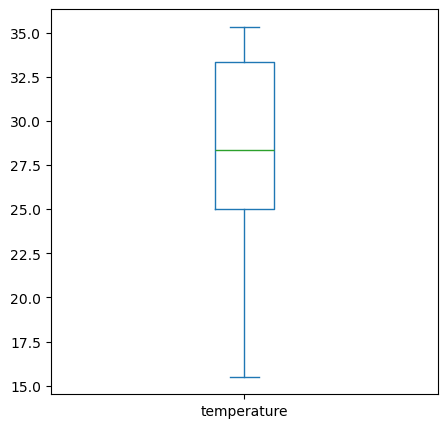

In [31]:
plt.figure(figsize=(5,5))
df['temperature'].plot(kind = 'box')
plt.show()

In [32]:
#skewnesss
sekw = df[numerical_cols].skew()
sekw

N                    -0.541937
P                     0.000000
K                     0.520573
pH                   -0.478465
rainfall              0.700727
temperature          -0.022863
Area_in_hectares      2.612339
Production_in_tons    1.753244
target                0.738260
dtype: float64

#  Exploratory Data Analysis 

# Univariate Analysis

In [33]:
df.value_counts('Crop_Type')

Crop_Type
kharif        1808
rabi           876
summer         606
whole year     230
Name: count, dtype: int64

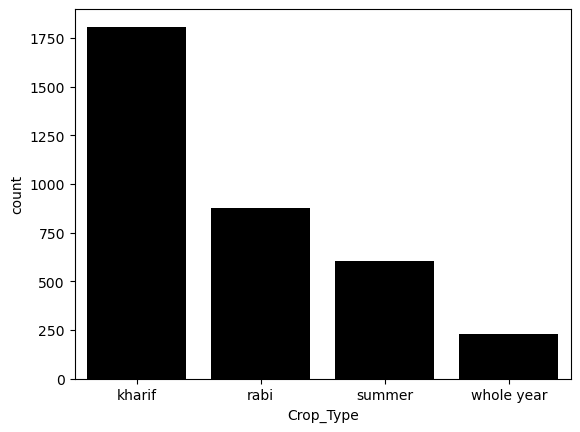

In [34]:
sns.countplot(x='Crop_Type',data=df,color='black')
plt.show()

In [35]:
df.value_counts('Crop')

Crop
maize         911
rice          572
moong         542
jowar         499
ragi          344
barley        281
cotton        217
rapeseed      128
jute           20
cashewnuts      6
Name: count, dtype: int64

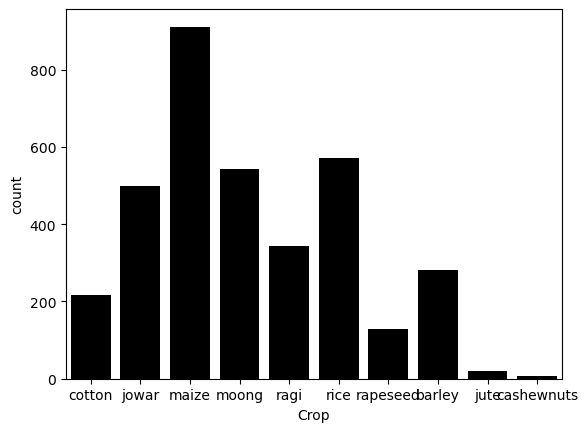

In [66]:
sns.countplot(x='Crop',data=df,color='black')
plt.show()

<Axes: ylabel='count'>

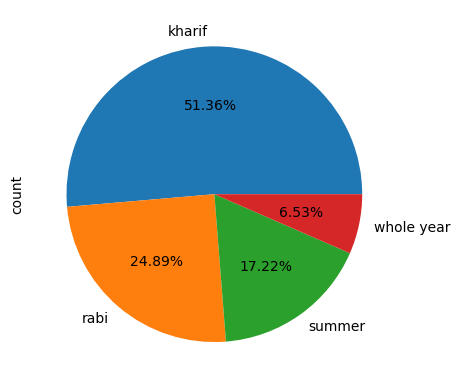

In [37]:
df['Crop_Type'].value_counts().plot(kind="pie",autopct="%1.2f%%")

<Axes: ylabel='count'>

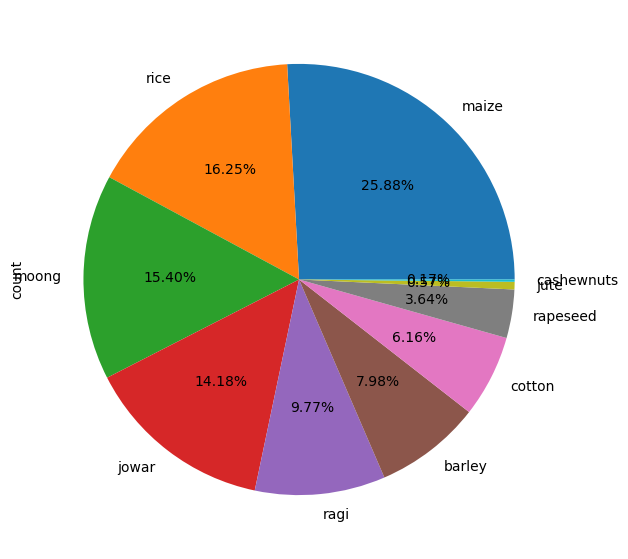

In [68]:
plt.figure(figsize=(7,7))
df['Crop'].value_counts().plot(kind="pie",autopct="%.2f%%")

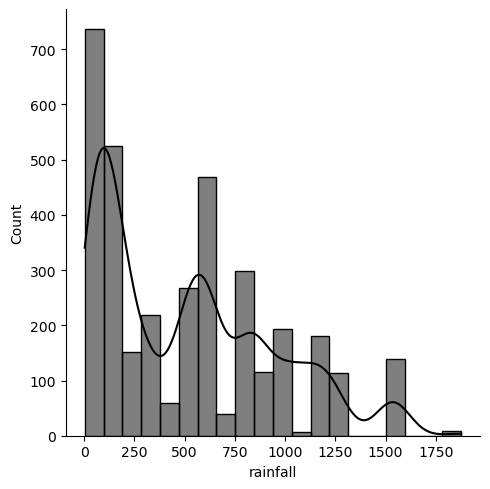

In [39]:
df.value_counts('rainfall')
sns.displot(x='rainfall',data=df,kde=True,color='black')
plt.show()

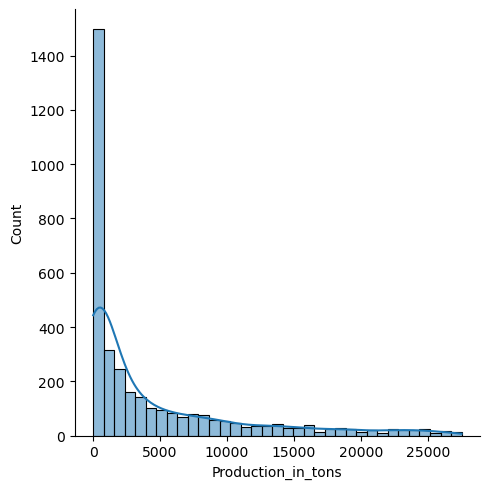

In [40]:
sns.displot(x='Production_in_tons',data=df,kde=True)
plt.show()

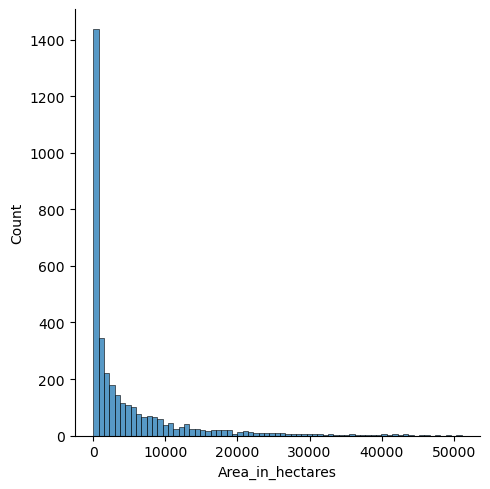

In [41]:
sns.displot(df['Area_in_hectares'])
plt.show()

# Bivariant Analysis

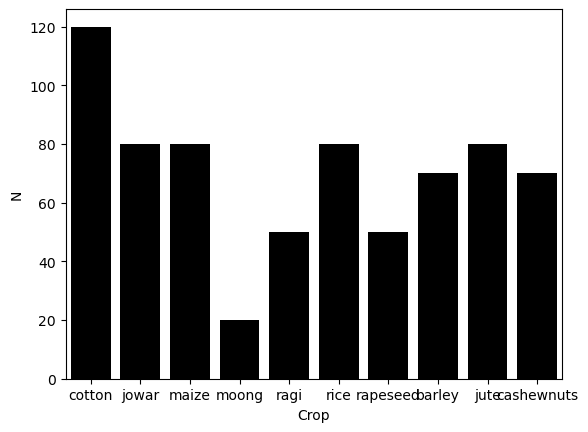

In [42]:
sns.barplot(x='Crop',y='N',data=df,color='black')
plt.show()

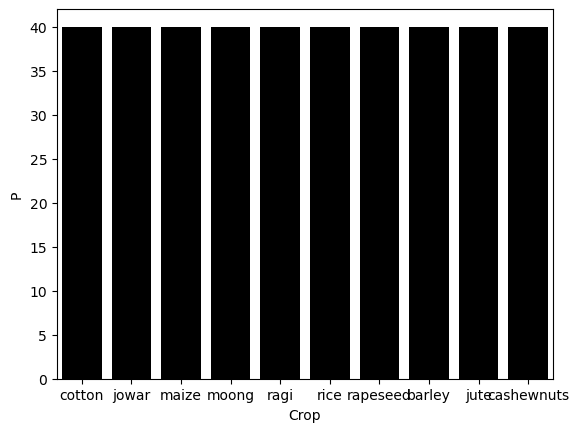

In [70]:
sns.barplot(x='Crop',y='P',data=df,color='black')
plt.show()

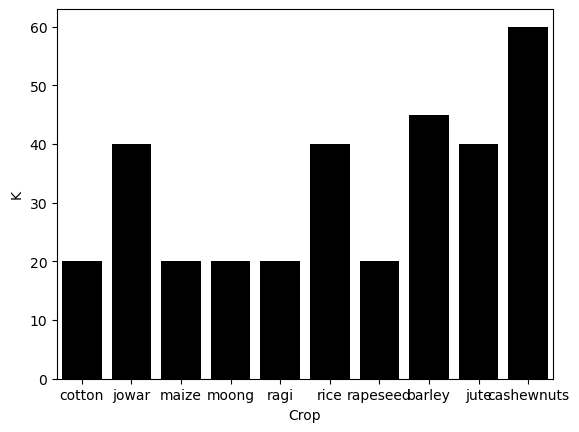

In [44]:
sns.barplot(x='Crop',y='K',data=df,color='black')
plt.show()

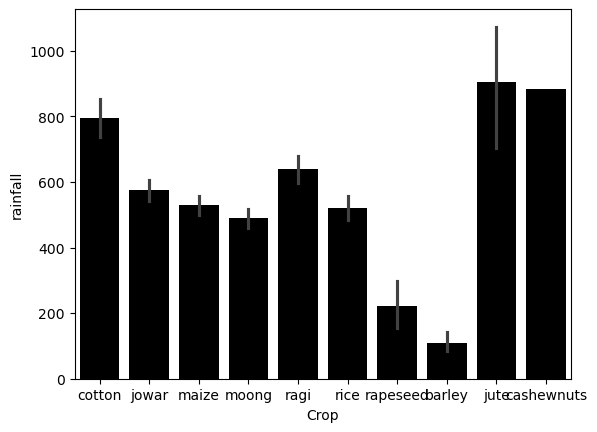

In [45]:
sns.barplot(x='Crop',y='rainfall',data=df,color='black')
plt.show()

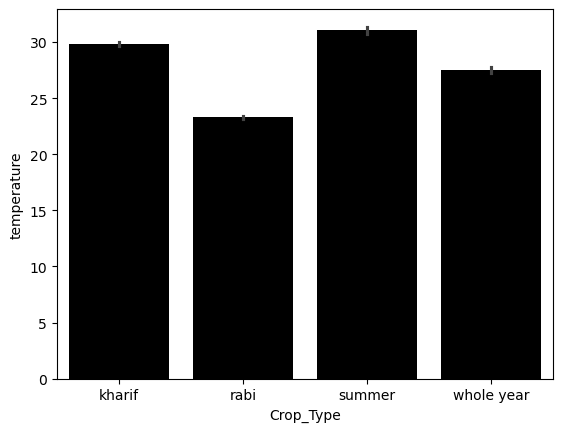

In [46]:
sns.barplot(x='Crop_Type',y='temperature',data=df,color='black')
plt.show()

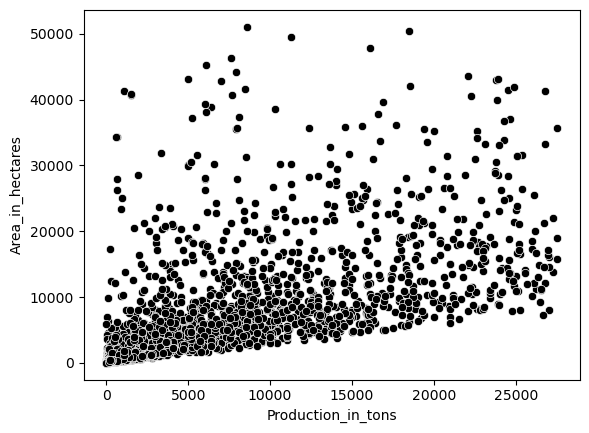

In [47]:
sns.scatterplot(x='Production_in_tons',y='Area_in_hectares',data=df,color='black')
plt.show()

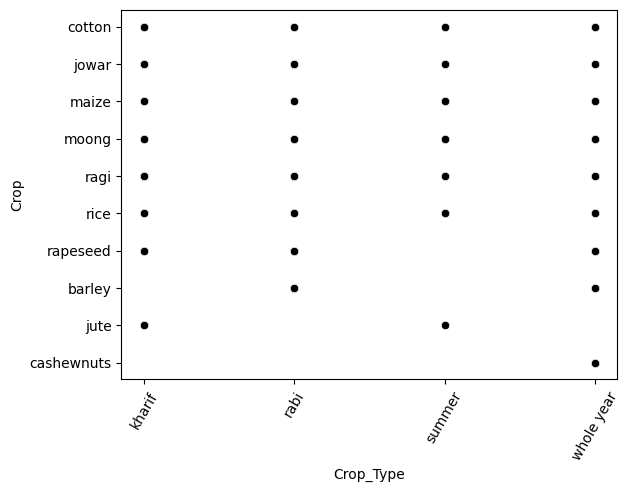

In [48]:
sns.scatterplot(x='Crop_Type',y='Crop',data=df,color='black')
plt.xticks(rotation=60)
plt.show()

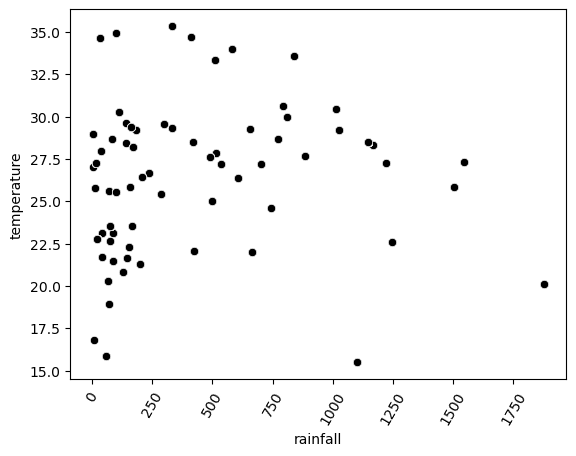

In [49]:
sns.scatterplot(x='rainfall',y='temperature',data=df,color='black')
plt.xticks(rotation=60)
plt.show()

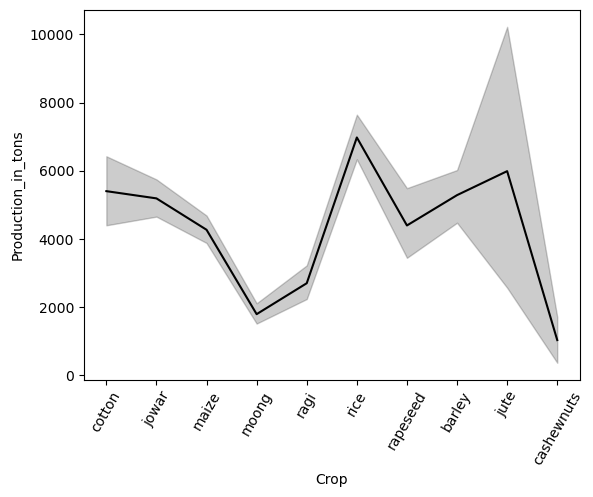

In [50]:
sns.lineplot(x='Crop',y='Production_in_tons',data=df,color='black')
plt.xticks(rotation=60)
plt.show()

# Multivariate Analysis

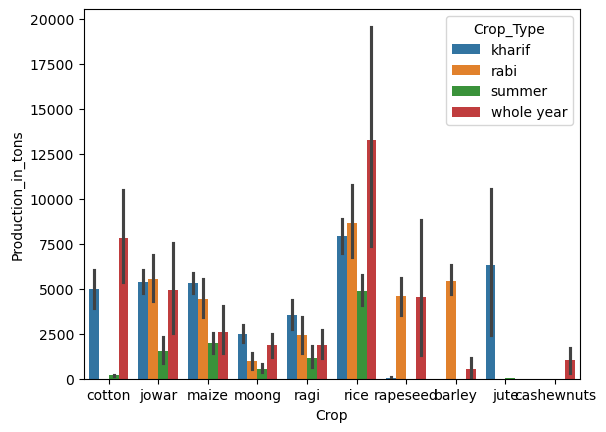

In [51]:
sns.barplot(x='Crop',y='Production_in_tons',hue='Crop_Type',data=df)
plt.show()

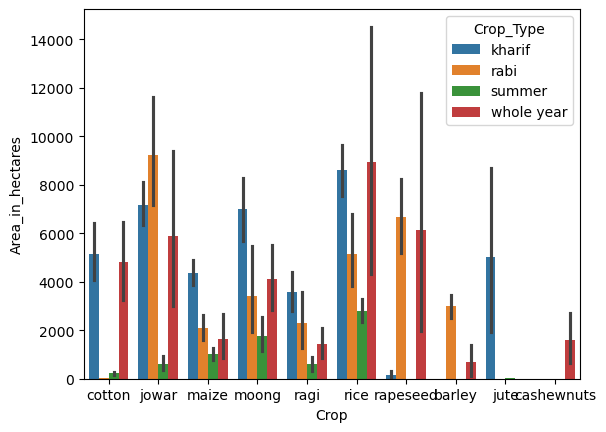

In [52]:
sns.barplot(x='Crop',y='Area_in_hectares',hue='Crop_Type',data=df)
plt.show()

In [53]:
pd.crosstab(df['Crop'],df['Crop_Type'])

Crop_Type,kharif,rabi,summer,whole year
Crop,,,,
barley,0,272,0,9
cashewnuts,0,0,0,6
cotton,175,2,2,38
jowar,347,105,25,22
jute,19,0,1,0
maize,500,163,210,38
moong,308,80,116,38
ragi,168,73,43,60
rapeseed,5,113,0,10


<Axes: xlabel='Crop_Type', ylabel='Crop'>

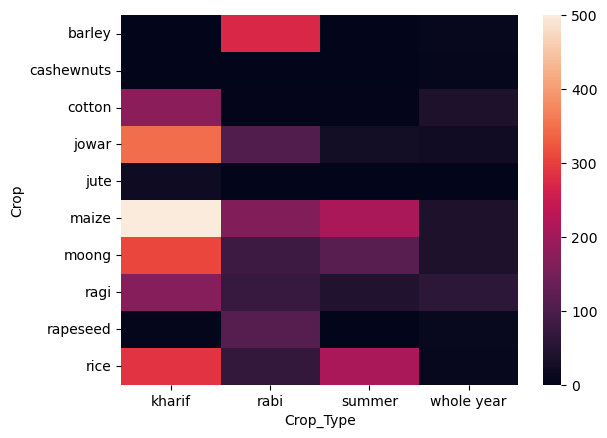

In [54]:
sns.heatmap(pd.crosstab(df['Crop'],df['Crop_Type']))

#  Encoding

In [55]:
df_1 = df.copy()

In [56]:
binary_en = BinaryEncoder()

In [57]:
df_bainary_en =binary_en.fit_transform(df_1[['Crop_Type','Crop']])
df_2 = pd.concat([df_1,df_bainary_en],axis = 1)
df_2

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target,Crop_Type_0,Crop_Type_1,Crop_Type_2,Crop_0,Crop_1,Crop_2,Crop_3
0,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671,0,0,1,0,0,0,1
2,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901,0,0,1,0,0,1,0
3,kharif,maize,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000,0,0,1,0,0,1,1
4,kharif,moong,20,40,20,5.68,654.34,29.266667,1300,500,0.384615,0,0,1,0,1,0,0
5,kharif,ragi,50,40,20,5.64,654.34,29.266667,6700,11800,1.761194,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,kharif,ragi,50,40,20,5.56,579.75,34.010000,1,1,1.000000,0,0,1,0,1,0,1
9992,rabi,barley,70,40,45,5.60,75.32,22.676000,8666,12950,1.494346,0,1,0,1,0,0,0
9996,summer,maize,80,40,20,5.40,34.81,34.666667,152,154,1.013158,0,1,1,0,0,1,1
9997,summer,moong,20,40,20,5.60,34.81,34.666667,488,211,0.432377,0,1,1,0,1,0,0


In [58]:
label_en = LabelEncoder()

In [59]:
df_1['Crop'] = label_en.fit_transform(df['Crop'])
df_1

,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,target
0,kharif,2,120,40,20,5.46,654.34,29.266667,7300,9400,1.287671
2,kharif,3,80,40,40,5.42,654.34,29.266667,10100,10200,1.009901
3,kharif,5,80,40,20,5.62,654.34,29.266667,2800,4900,1.750000
4,kharif,6,20,40,20,5.68,654.34,29.266667,1300,500,0.384615
5,kharif,7,50,40,20,5.64,654.34,29.266667,6700,11800,1.761194
...,...,...,...,...,...,...,...,...,...,...,...
9990,kharif,7,50,40,20,5.56,579.75,34.010000,1,1,1.000000
9992,rabi,0,70,40,45,5.60,75.32,22.676000,8666,12950,1.494346
9996,summer,5,80,40,20,5.40,34.81,34.666667,152,154,1.013158
9997,summer,6,20,40,20,5.60,34.81,34.666667,488,211,0.432377
